In [3]:
# Import Pandas with the alias pd
import pandas as pd

# Check Pandas version
pd.__version__

'1.5.3'

In [4]:
# Create a Pandas dataframe with the first 100 rows of the xslx
# See Pandas documentation or YouTube videos for info about dataframes
df = pd.read_excel('Financial_Sample.xlsx')

In [5]:
Lloyds_data = df 

In [15]:
Lloyds_data

,Segment,Country,Product,Discount Band,Units Sold,Manufacturing Price,Sale Price,Gross Sales,Discounts,Sales,COGS,Profit,Date,Month Number,Month Name,Year,month_number,month_name,year
22,Midmarket,France,Paseo,None,549.0,10,15,8235.0,0.0,8235.0,5490.0,2745.0,2013-09-01,9,September,2013,9,September,2013
23,Small Business,Mexico,Paseo,None,788.0,10,300,236400.0,0.0,236400.0,197000.0,39400.0,2013-09-01,9,September,2013,9,September,2013
42,Government,France,VTT,None,1527.0,250,350,534450.0,0.0,534450.0,397020.0,137430.0,2013-09-01,9,September,2013,9,September,2013
62,Enterprise,United States of America,Carretera,Low,330.0,3,125,41250.0,412.5,40837.5,39600.0,1237.5,2013-09-01,9,September,2013,9,September,2013
72,Small Business,United States of America,Montana,Low,2498.0,5,300,749400.0,7494.0,741906.0,624500.0,117406.0,2013-09-01,9,September,2013,9,September,2013
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
637,Midmarket,Canada,Montana,High,2300.0,5,15,34500.0,4830.0,29670.0,23000.0,6670.0,2014-12-01,12,December,2014,12,December,2014
680,Channel Partners,United States of America,Paseo,High,914.0,10,12,10968.0,1645.2,9322.8,2742.0,6580.8,2014-12-01,12,December,2014,12,December,2014
681,Government,France,Paseo,High,293.0,10,20,5860.0,879.0,4981.0,2930.0,2051.0,2014-12-01,12,December,2014,12,December,2014
687,Channel Partners,United States of America,Velo,High,914.0,120,12,10968.0,1645.2,9322.8,2742.0,6580.8,2014-12-01,12,December,2014,12,December,2014


In [13]:
Lloyds_data_result = Lloyds_data.assign(
    **{
        "COGS/Units Sold": Lloyds_data["COGS"] / Lloyds_data["Units Sold"],
        "COGS/Units Sold/Manufacturing Price": Lloyds_data["COGS"] / Lloyds_data["Units Sold"] / Lloyds_data["Manufacturing Price"].astype(float),
        "COGS/Manufacturing Price": Lloyds_data["COGS"] / Lloyds_data["Manufacturing Price"].astype(float)
    }
)[["COGS/Units Sold", "COGS/Units Sold/Manufacturing Price", "Manufacturing Price", "COGS/Manufacturing Price"]]

print(Lloyds_data_result)

     COGS/Units Sold  COGS/Units Sold/Manufacturing Price  \
22              10.0                                1.000   
23             250.0                               25.000   
42             260.0                                1.040   
62             120.0                               40.000   
72             250.0                               50.000   
..               ...                                  ...   
637             10.0                                2.000   
680              3.0                                0.300   
681             10.0                                1.000   
687              3.0                                0.025   
694             10.0                                0.040   

     Manufacturing Price  COGS/Manufacturing Price  
22                    10                    549.00  
23                    10                  19700.00  
42                   250                   1588.08  
62                     3                  13200.00  
72

In [22]:
# Extract month number, month name, and year from the "Date" column
Lloyds_data['month_number'] = Lloyds_data['Date'].dt.month
Lloyds_data['month_name'] = Lloyds_data['Date'].dt.strftime('%B')
Lloyds_data['year'] = Lloyds_data['Date'].dt.year

# Sort the dataframe by year and month_number
Lloyds_data.sort_values(by=['year', 'month_number'], inplace=True)

# Select the desired columns
date_normalized = Lloyds_data[['Date', 'month_number', 'month_name', 'year']]

# Print the result
print(date_normalized)


          Date  month_number month_name  year
22  2013-09-01             9  September  2013
23  2013-09-01             9  September  2013
42  2013-09-01             9  September  2013
62  2013-09-01             9  September  2013
72  2013-09-01             9  September  2013
..         ...           ...        ...   ...
637 2014-12-01            12   December  2014
680 2014-12-01            12   December  2014
681 2014-12-01            12   December  2014
687 2014-12-01            12   December  2014
694 2014-12-01            12   December  2014

[700 rows x 4 columns]


In [30]:
# Perform the join on "Date" column
merged_data = pd.merge(date_normalized, Lloyds_data, on='Date')

# Filter the merged data based on the conditions
filtered_data = merged_data[
    (merged_data['month_number_x'] != merged_data['Month Number'].astype(float)) &
    (merged_data['month_name_x'] != merged_data['Month Name']) &
    (merged_data['year_x'] != merged_data['Year'].astype(float))
]

# Calculate the count
count = len(filtered_data)

# Print the count
print(count)

0


In [32]:
# Filter the dataframe based on the condition
filtered_data = Lloyds_data[Lloyds_data['Discount Band'] != 'None']

# Calculate the average discount percentage by product
grouped_data = filtered_data.groupby('Product')['Discounts', 'Gross Sales'].mean()
grouped_data['averagediscountpercentage'] = grouped_data['Discounts'] / grouped_data['Gross Sales'] * 100

# Convert the 'averagediscountpercentage' column to numeric with 5 decimal places
grouped_data['averagediscountpercentage'] = grouped_data['averagediscountpercentage'].round(5)

# Print the result
print(grouped_data[['averagediscountpercentage']])

           averagediscountpercentage
Product                             
Amarilla                     7.40146
Carretera                    7.86627
Montana                      7.37098
Paseo                        7.71765
VTT                          7.25690
Velo                         8.38742


C:\Users\owned\AppData\Local\Temp\ipykernel_7012\3778878822.py:5: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  grouped_data = filtered_data.groupby('Product')['Discounts', 'Gross Sales'].mean()


In [34]:
# Select distinct values of Product and Manufacturing Price
result = Lloyds_data[['Product', 'Manufacturing Price']].drop_duplicates()

# Print the result
print(result)

       Product  Manufacturing Price
22       Paseo                   10
42         VTT                  250
62   Carretera                    3
72     Montana                    5
96    Amarilla                  260
179       Velo                  120


In [37]:
# Perform the groupby operation and calculate the sum of Sales and Profit
grouped_data = Lloyds_data.groupby(['Year', Lloyds_data['Date'].dt.quarter]).agg(
    sum_sales=(' Sales', 'sum'),
    sum_profit=('Profit', 'sum')
).round(2)

# Reset the index to make Year and quarter separate columns
grouped_data.reset_index(inplace=True)

# Rename the quarter column to match the SQL query
grouped_data.rename(columns={'Date': 'quarter'}, inplace=True)

# Print the result
print(grouped_data[['sum_sales', 'sum_profit', 'Year', 'quarter']])

     sum_sales  sum_profit  Year  quarter
0   4484000.03   763603.03  2013        3
1  21931255.48  3114861.48  2013        4
2  19492152.94  2632442.94  2014        1
3  22693879.95  3232378.45  2014        2
4  20366239.84  2738064.34  2014        3
5  29758822.02  4412352.02  2014        4


In [45]:
# Group the data by a single column
df = Lloyds_data.sort_values('Country')
grouped_data = df.groupby('Country')

# Apply an aggregate function to the grouped data
result=grouped_data['Units Sold'].agg(['sum', 'mean','count', 'min', 'max'])

# Print the result
print(result)

                               sum         mean  count    min     max
Country                                                              
Canada                    247428.5  1767.346429    140  200.0  4251.0
France                    240931.0  1720.935714    140  293.0  4243.5
Germany                   201494.0  1439.242857    140  214.0  4219.5
Mexico                    203325.0  1452.321429    140  245.0  2993.0
United States of America  232627.5  1661.625000    140  263.0  4492.5


In [55]:
# Group the data by a single column
df = Lloyds_data.sort_values('Country')
grouped_data = df.groupby('Country')

# Apply an aggregate function to the grouped data
result=grouped_data['Units Sold'].agg(['sum', 'mean','count', 'min', 'max'])

# Print the result
print(result)

                               sum         mean  count    min     max
Country                                                              
Canada                    247428.5  1767.346429    140  200.0  4251.0
France                    240931.0  1720.935714    140  293.0  4243.5
Germany                   201494.0  1439.242857    140  214.0  4219.5
Mexico                    203325.0  1452.321429    140  245.0  2993.0
United States of America  232627.5  1661.625000    140  263.0  4492.5


In [59]:
# Perform the grouping and aggregation
result = df.groupby(['Country', 'Product']).agg({'Units Sold': 'sum'}).reset_index()

# Sort the result
result = result.sort_values(by=['Country', 'Product'])

# Print the result
print(result)

                     Country    Product  Units Sold
0                     Canada   Amarilla     29232.0
1                     Canada  Carretera     34804.0
2                     Canada    Montana     31488.5
3                     Canada      Paseo     78191.5
4                     Canada        VTT     41248.5
5                     Canada       Velo     32464.0
6                     France   Amarilla     31603.0
7                     France  Carretera     34056.0
8                     France    Montana     31282.0
9                     France      Paseo     71606.0
10                    France        VTT     35774.5
11                    France       Velo     36609.5
12                   Germany   Amarilla     30614.5
13                   Germany  Carretera     24944.0
14                   Germany    Montana     28061.0
15                   Germany      Paseo     55693.5
16                   Germany        VTT     31131.0
17                   Germany       Velo     31050.0
18          

In [7]:
# Perform the grouping and aggregation
result = df.groupby(['Country', 'Product', 'Month Number', 'Year']).agg({
    'Units Sold': ['sum', 'mean']
}).reset_index()

# Rename the aggregated columns
result.columns = ['Country', 'Product', 'Month Number', 'Year', 'Sum', 'Avg']

# Sort the result
result = result.sort_values(by=['Country', 'Product', 'Year', 'Month Number'])

# Print the result
print(result)

                      Country   Product  Month Number  Year     Sum  \
8                      Canada  Amarilla             9  2013  2761.0   
10                     Canada  Amarilla            10  2013  2971.0   
13                     Canada  Amarilla            12  2013  1778.0   
0                      Canada  Amarilla             1  2014  1659.0   
1                      Canada  Amarilla             2  2014  2240.0   
..                        ...       ...           ...   ...     ...   
460  United States of America      Velo             8  2014  5653.0   
462  United States of America      Velo             9  2014  1596.0   
464  United States of America      Velo            10  2014  3413.0   
466  United States of America      Velo            11  2014   547.0   
468  United States of America      Velo            12  2014  2286.0   

             Avg  
8    2761.000000  
10   1485.500000  
13   1778.000000  
0    1659.000000  
1    2240.000000  
..           ...  
460  2826.5000

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

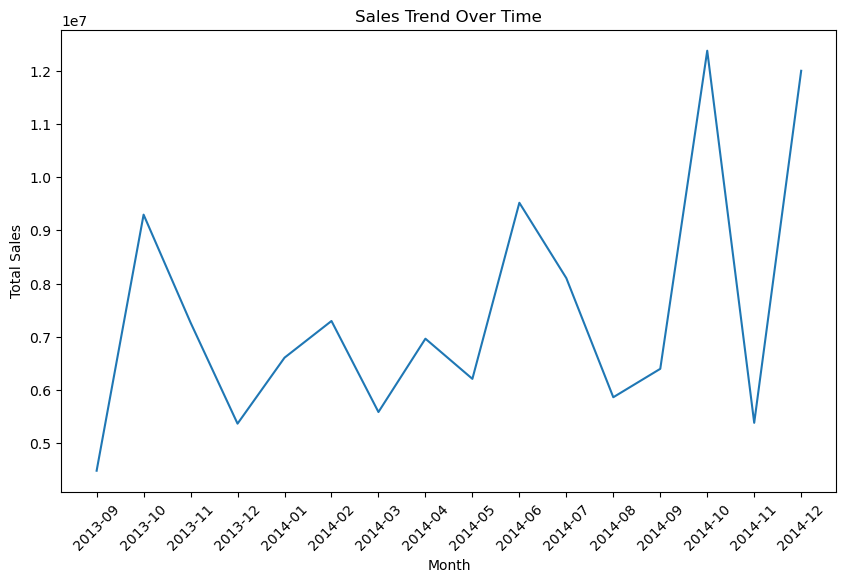

In [23]:
df['Date'] = pd.to_datetime(df['Date'])
df['YearMonth'] = df['Date'].dt.to_period('M')
'''
creates a new column called 'YearMonth' in the DataFrame df.
.dt accesses the datetime properties of the 'Date' column.

.to_period('M') converts the datetime values to a Period object with a monthly frequency ('M'). 
This means that the dates are rounded to the nearest month and represented as strings in the format 'YYYY-MM', where 'YYYY' is the year 
and 'MM' is the month.
'''
monthly_sales = df.groupby('YearMonth')[' Sales'].sum()
'''
df.groupby('YearMonth'): This groups the data in the DataFrame df by the 'YearMonth' column. It creates a GroupBy object that represents 
the grouped data.

[' Sales']: This specifies the column on which the aggregation operation will be performed. In this case, it selects the ' Sales' column 
of the grouped data.

.sum(): This applies the sum aggregation function to each group's ' Sales' column. It calculates the total sum of sales for each group.
'''

# Convert Period objects to strings
'''
In the previous code, the monthly_sales Series was created with a Period index, which represents each month as a period. 
However, when plotting the data using plt.plot(), the x-axis values are typically expected to be strings or numeric values. 
Therefore, to ensure compatibility with the plotting function, the index is converted to strings using the astype() method.

The astype(str) function call converts each element of the index to a string data type, allowing it to be plotted correctly on the x-axis. 
After this conversion, the index of the monthly_sales Series will be a string representation of each month, such as '2021-01', '2021-02', '2021-03', etc.
'''
monthly_sales.index = monthly_sales.index.astype(str)

# Plotting the sales trend
plt.figure(figsize=(10, 6))
plt.plot(monthly_sales.index, monthly_sales.values)
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.title('Sales Trend Over Time')
plt.xticks(rotation=45)
plt.show()

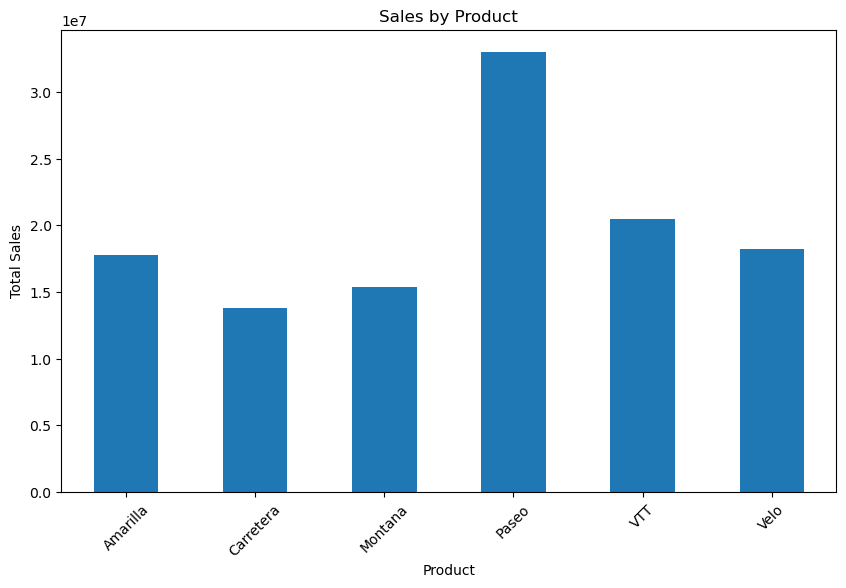

In [24]:
product_sales = df.groupby('Product')[' Sales'].sum()
'''
Groups the DataFrame df by the 'Product' column and calculates the sum of the 'Sales' column for each group. 
Assigns the resulting Series to the variable product_sales. 
'''

# Plotting the sales by product
plt.figure(figsize=(10, 6))
product_sales.plot(kind='bar')
'''
plots the data in product_sales as a bar plot. Each product will have a corresponding bar representing its total sales. 
The kind='bar' parameter specifies the type of plot to be created
'''
plt.xlabel('Product')
plt.ylabel('Total Sales')
plt.title('Sales by Product')
plt.xticks(rotation=45)
plt.show()

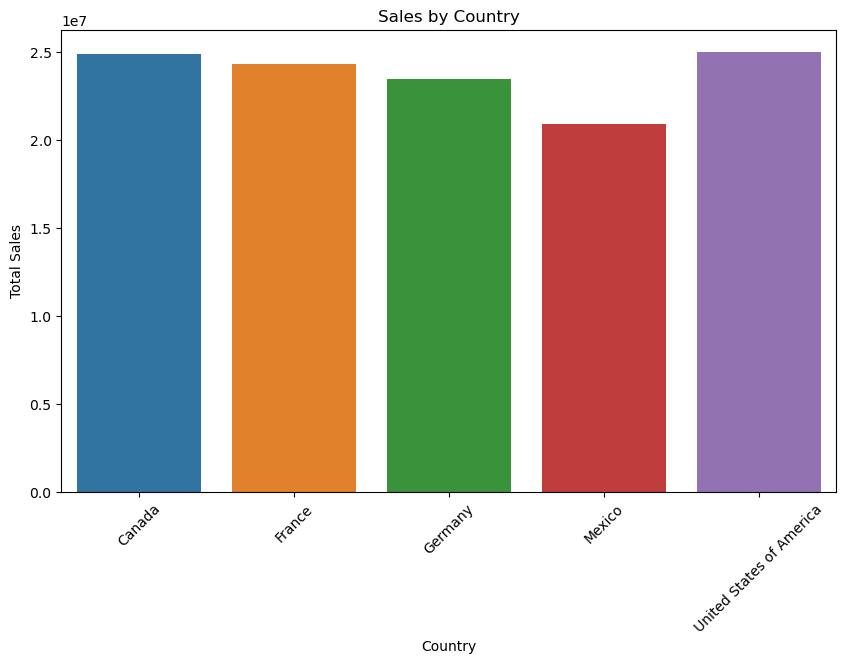

In [21]:
country_sales = df.groupby('Country')[' Sales'].sum()
'''
Groups the DataFrame df by the 'Country' column and calculates the sum of the 'Sales' column for each group. 
Assigns the resulting Series to the variable country_sales.
'''
# Plotting the sales by country
plt.figure(figsize=(10, 6))
sns.barplot(x=country_sales.index, y=country_sales.values)
'''
Creates a bar plot using the Seaborn library (sns). It takes the index of the country_sales Series (which contains the country names) as the
x-axis values and the values of the country_sales Series (which contain the total sales for each country) as the y-axis values. The barplot 
function automatically aggregates the values and displays the average value as the height of each bar.
'''
plt.xlabel('Country')
plt.ylabel('Total Sales')
plt.title('Sales by Country')
plt.xticks(rotation=45)
plt.show()